In [1]:
import Codigo as cg
import matplotlib.pyplot as plt
data = cg.EleccionDatos('../Alemania_Reducida.csv', "PIB (US")

['PIB (US$ a precios actuales)', 'PIB (US$ a precios constantes de 2010)']


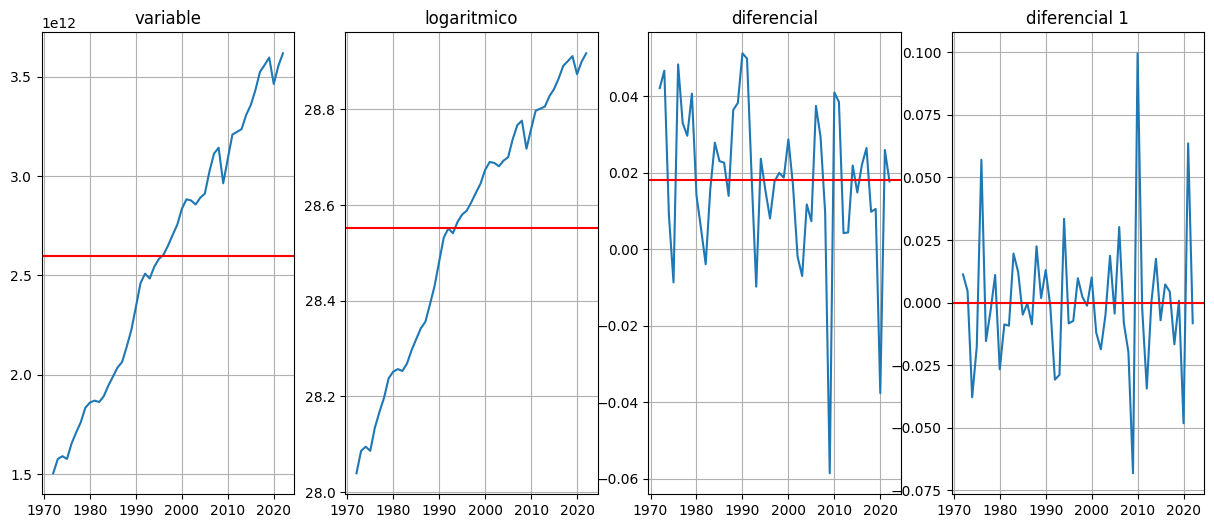

In [2]:
dt = data['PIB (US$ a precios constantes de 2010)']
dt = cg.VariableTotal(dt)
dt['diferencial 1'] = dt['diferencial'].diff(1)
dt.dropna(axis = 0, inplace = True)
cg.Total_graphs(dt)

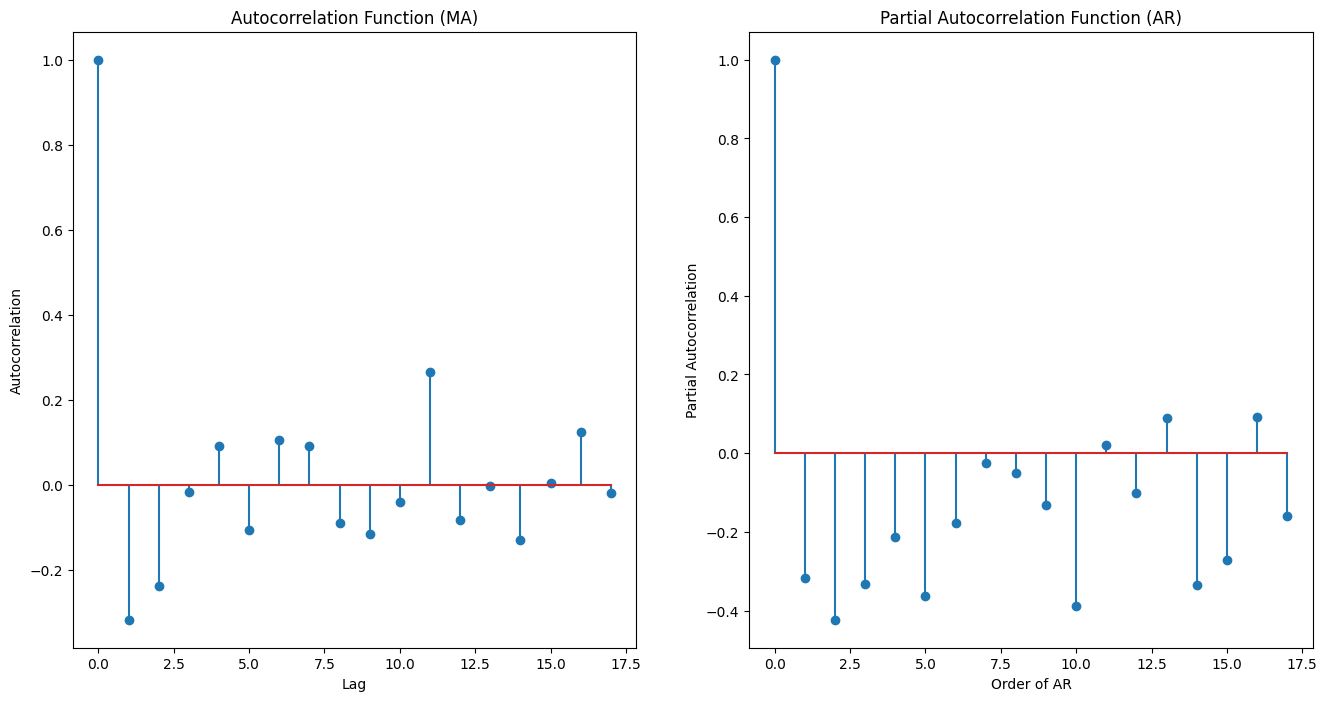

In [3]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
cg.acf_ma(dt['diferencial 1'], inx = 0)
plt.subplot(1,2,2)
cg.pacf_ar(dt['diferencial 1'])

In [4]:
cg.Regresiones(dt['diferencial 1'], 5)

                                 OLS Regression Results                                
Dep. Variable:               variable   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              410.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    7.14e-34
Time:                        23:06:16   Log-Likelihood:                          193.21
No. Observations:                  46   AIC:                                     -376.4
Df Residuals:                      41   BIC:                                     -367.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
resultados, pval = cg.ModeloARMA(dt['diferencial 1'], 0,1, trend = [0])
print(resultados.summary())


                               SARIMAX Results                                
Dep. Variable:          diferencial 1   No. Observations:                   51
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 124.836
Date:                Tue, 28 Nov 2023   AIC                           -245.671
Time:                        23:06:33   BIC                           -241.807
Sample:                             0   HQIC                          -244.195
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9246      0.079    -11.715      0.000      -1.079      -0.770
sigma2         0.0004   6.06e-05      6.950      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.21   Jarque-

In [6]:
# Aqui creamos un sistema logico que busque el mejor tomando en cuenta los los pvalores y el akaike menor
import pandas as pd
cg.Pruebatoolkit(dt['diferencial 1'], 8,trend = [0], p_value= 0.05)

Mejor orden encontrado: (0, 1) con AIC: -245.67108798276547


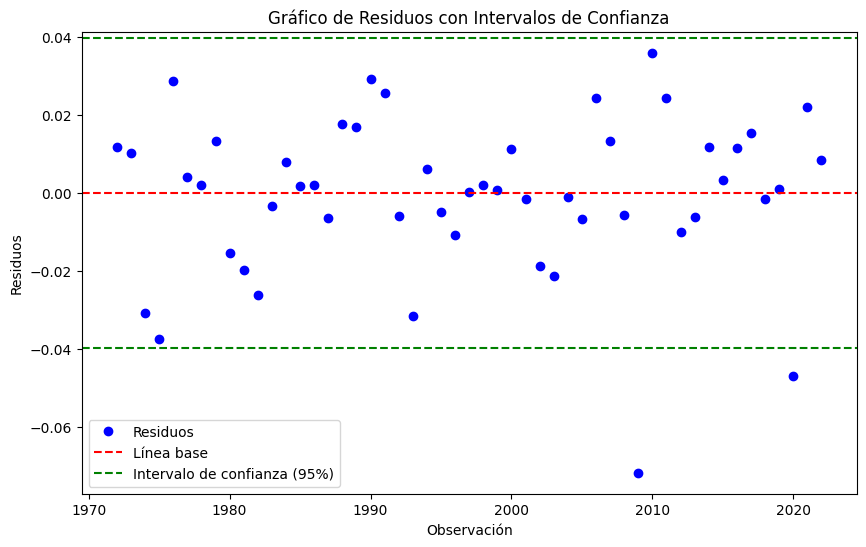

In [7]:
cg.Pormanteau_test(dt['diferencial 1'], 1, 1, rezagos= 50)

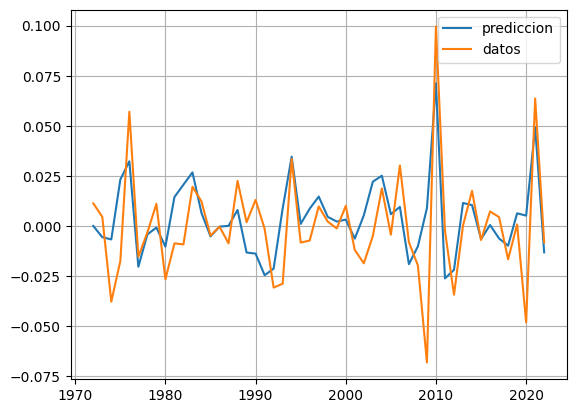

In [11]:
plt.plot(resultados.fittedvalues, label = 'prediccion')
plt.plot(dt['diferencial 1'], label = 'datos')
plt.legend()
plt.grid()
plt.show()